In [ ]:
!pip install split-folders

In [ ]:
# Kullanılacak kütüphaneleri import edelim:

import pandas as pd
import numpy as np

import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

import seaborn as sns

import splitfolders

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
# .csv dosyasını okuyalım:
data = pd.read_csv("/content/drive/MyDrive/KIDNEY STONE/kidneyData.csv")

In [ ]:
data.head()

,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor


In [ ]:
data


,Unnamed: 0,image_id,path,diag,target,Class
0,0,Tumor- (1044),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
1,1,Tumor- (83),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
2,2,Tumor- (580),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
3,3,Tumor- (1701),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
4,4,Tumor- (1220),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Tumor,3,Tumor
...,...,...,...,...,...,...
12441,12441,Cyst- (2522),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12442,12442,Cyst- (2627),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12443,12443,Cyst- (972),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst
12444,12444,Cyst- (2323),"/content/data/CT KIDNEY DATASET Normal, CYST, ...",Cyst,0,Cyst


In [ ]:
# veri seti hakkında:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12446 entries, 0 to 12445
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  12446 non-null  int64 
 1   image_id    12446 non-null  object
 2   path        12446 non-null  object
 3   diag        12446 non-null  object
 4   target      12446 non-null  int64 
 5   Class       12446 non-null  object
dtypes: int64(2), object(4)
memory usage: 583.5+ KB


In [ ]:
data['Class'].unique()

array(['Tumor', 'Normal', 'Stone', 'Cyst'], dtype=object)

In [ ]:
# Hastalık sınıflarını bir diziye atalım:
disease_classes = data['Class'].value_counts()

In [ ]:
disease_classes

Normal    5077
Cyst      3709
Tumor     2283
Stone     1377
Name: Class, dtype: int64

In [ ]:
# Görüntüleri yükleyelim:
splitfolders.ratio(
    "/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"
   ,
  output = "./dataset",
    seed=1337,
    ratio=(0.8, 0.1, 0.1)
)

Copying files: 12446 files [01:14, 167.65 files/s]


In [ ]:
# Görüntüleri os kütüphanesi ile de okuyalım:
import os

In [ ]:
os.listdir('/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone']

In [ ]:
os.listdir('/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone')

['Normal', 'Tumor', 'Stone', 'Cyst']

In [ ]:
img_path = '/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone'

In [ ]:
for folder in os.listdir(img_path):
  list_of_elements = os.listdir(os.path.join(img_path, folder))

In [ ]:
# Tıbbi görüntüleri görüntülemek için:
normal_path = '/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal'
stone_path = '/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone'
cyst_path =  '/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst'
tumor_path = '/content/drive/MyDrive/KIDNEY STONE/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor'


In [ ]:
def plot_img(item, num = 25):
  all_item = os.listdir(item)
  item_files = [os.path.join(item, file) for file in all_item][:num]
  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.title(f'{img_path}'[-10:-4])
        plt.imshow(img)


  plt.tight_layout()

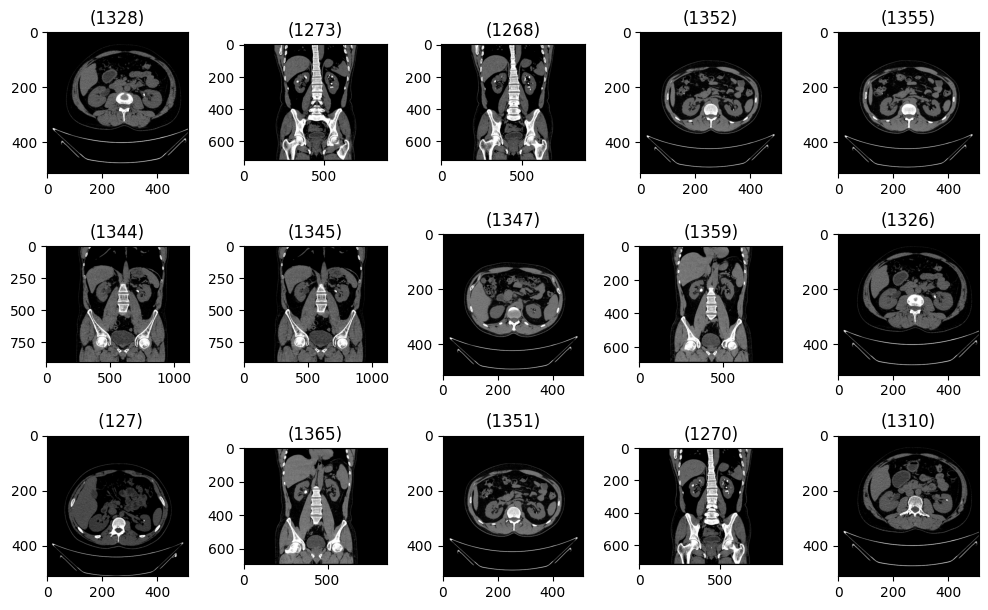

In [ ]:
plot_img(stone_path, 15)

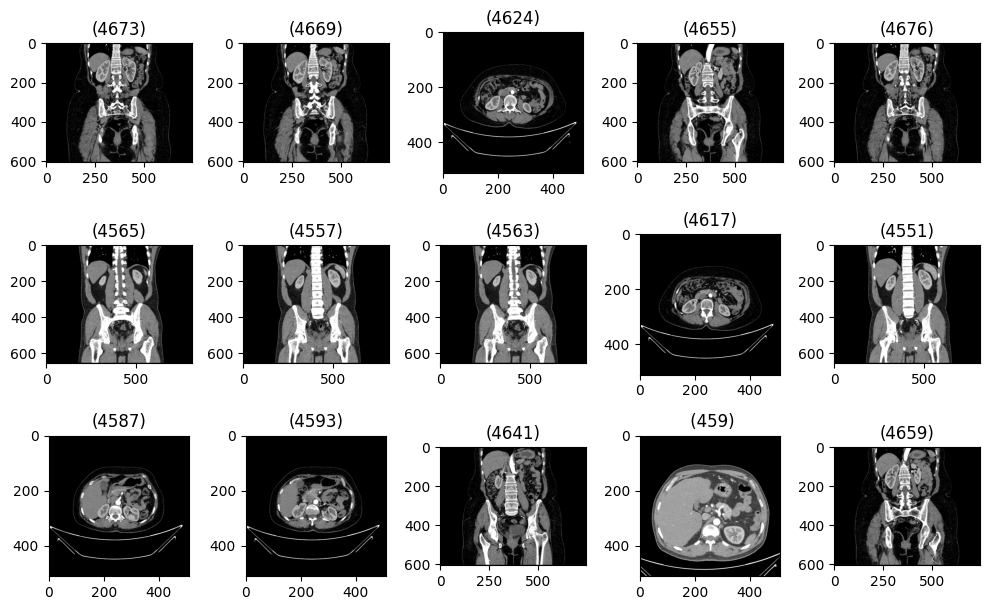

In [ ]:
plot_img(normal_path, 15)

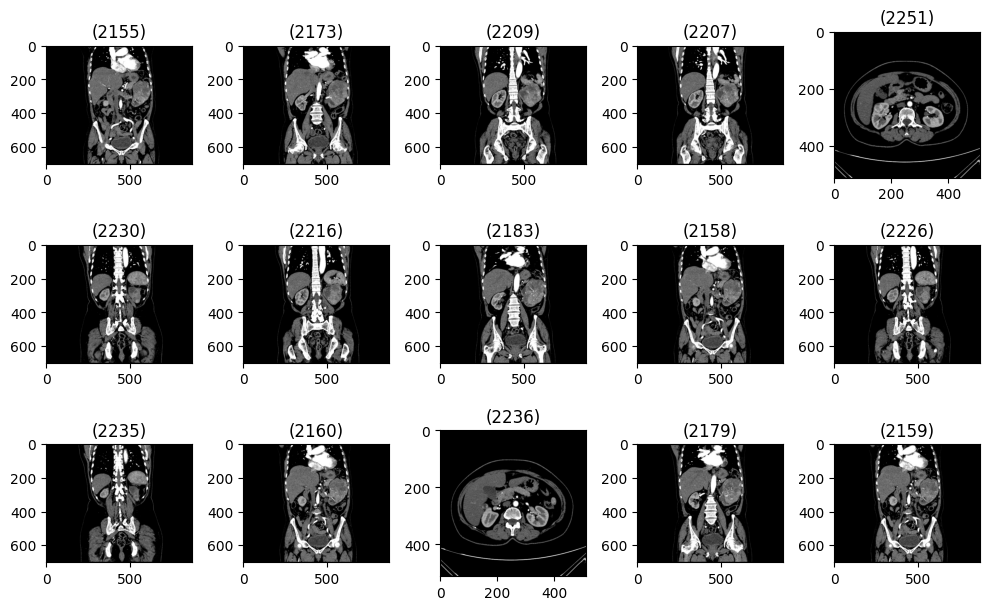

In [ ]:
plot_img(tumor_path, 15)

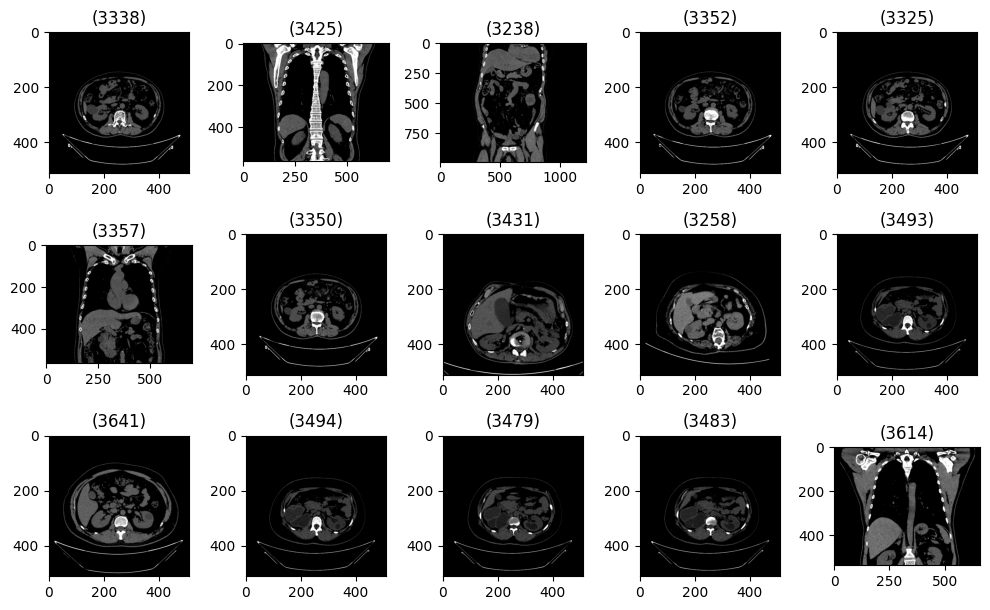

In [ ]:
plot_img(cyst_path, 15)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Train, Validation ve Test verilerini yükleyelim
train_datagen = ImageDataGenerator(rescale= 1/255)
valid_datagen = ImageDataGenerator(rescale= 1/255)
test_datagen = ImageDataGenerator(rescale= 1/255)

In [ ]:
train_dataset = train_datagen.flow_from_directory('./dataset/train',
                                                  target_size=(200, 200),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  )
valid_dataset = valid_datagen.flow_from_directory('./dataset/val',
                                                  target_size=(200, 200),
                                                  class_mode='categorical',
                                                  batch_size=100,
                                                  color_mode='grayscale',
                                                  )
test_dataset = test_datagen.flow_from_directory('./dataset/test',
                                                target_size=(200, 200),
                                                class_mode='categorical',
                                                color_mode='grayscale',
                                                batch_size=100,
                                                shuffle=False
                                                )

Found 9955 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=train_dataset.image_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
from keras.metrics import Precision, Recall

In [ ]:
# Modeli derleyelim
metrics = ['accuracy', Precision(name='precision'), Recall(name='recall')]
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=metrics)

In [ ]:
# Modeli eğitelim
history = model.fit(train_dataset, validation_data=valid_dataset, steps_per_epoch=3, epochs=35)

Epoch 1/35
3/3 [==============================] - 97s 40s/step - loss: 1.3459 - accuracy: 0.3200 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2919 - val_accuracy: 0.4082 - val_precision: 0.6859 - val_recall: 0.2391
Epoch 2/35
3/3 [==============================] - 111s 49s/step - loss: 1.3193 - accuracy: 0.3843 - precision: 0.5078 - recall: 0.2549 - val_loss: 1.3677 - val_accuracy: 0.3100 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/35
3/3 [==============================] - 114s 52s/step - loss: 1.3432 - accuracy: 0.3867 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.2831 - val_accuracy: 0.4984 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/35
3/3 [==============================] - 116s 51s/step - loss: 1.3011 - accuracy: 0.4500 - precision: 0.4222 - recall: 0.1267 - val_loss: 1.3332 - val_accuracy: 0.5193 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/35
3/3 [==============================] - 116s 51s/step - loss: 1

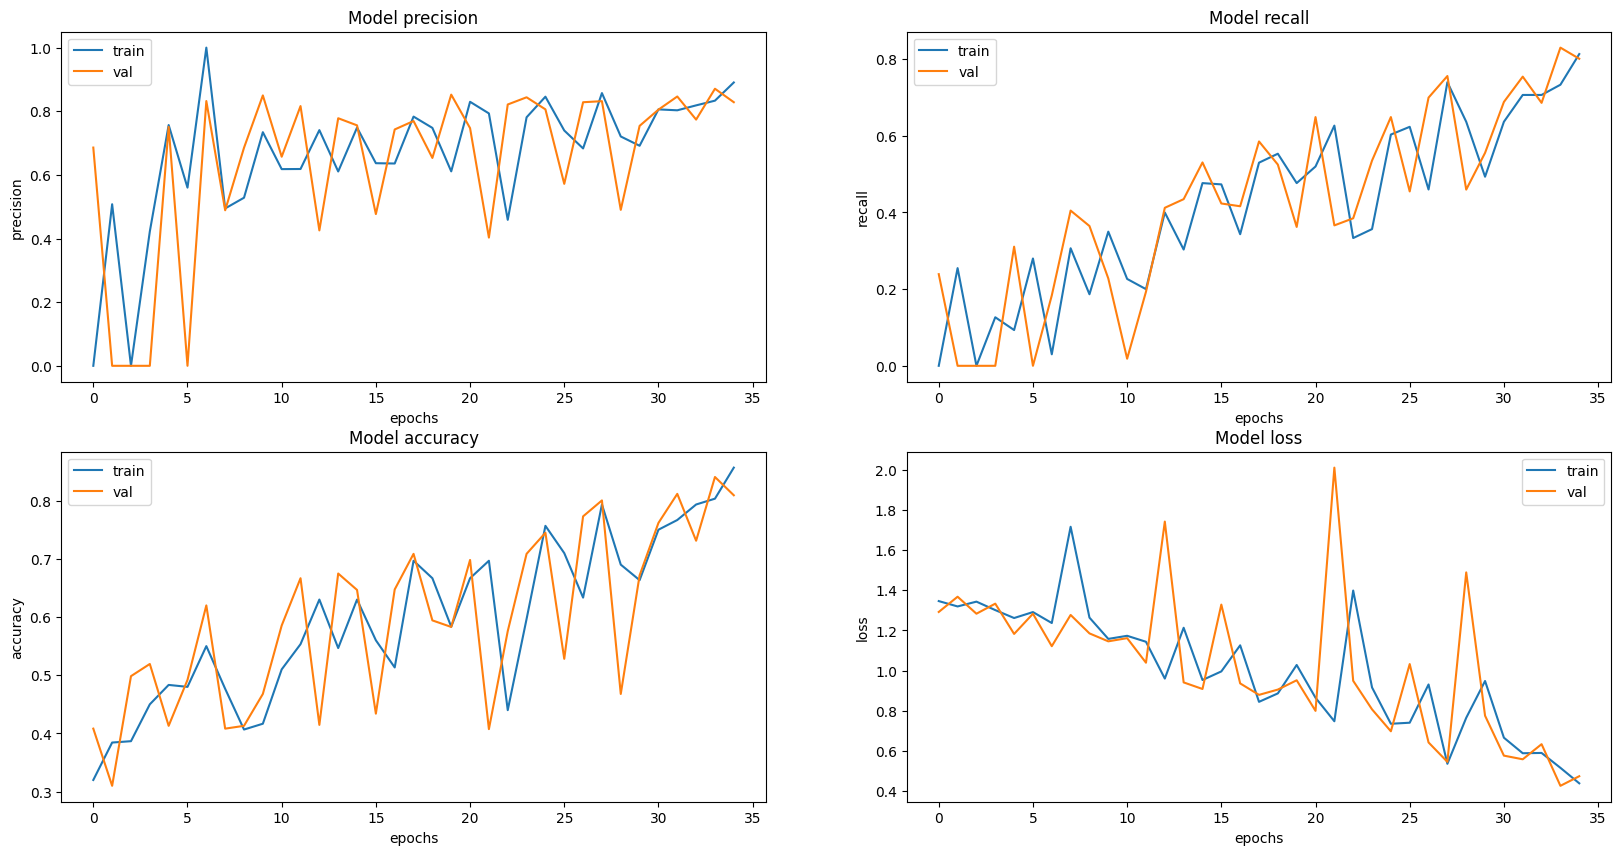

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [ ]:
predictions = model.predict(test_dataset)

13/13 [==============================] - 43s 3s/step


In [ ]:
disease_label = []

for key, value in train_dataset.class_indices.items():
   disease_label.append(key)

In [ ]:
def evaluate(actual, predictions):
  predict = []
  for i in predictions:
    predict.append(np.argmax(i))

  accuracy = (predict == actual).sum() / actual.shape[0]
  print(f'Accuracy: {accuracy}')

  precision, recall, f1_score, _ = precision_recall_fscore_support(actual, predict, average='macro')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1_score: {f1_score}')

  fig, ax = plt.subplots(figsize=(20,20))
  conf_mat = confusion_matrix(actual, predict)
  sns.heatmap(conf_mat, annot=True, fmt='.0f', cmap="YlGnBu", xticklabels=disease_label, yticklabels=disease_label).set_title('Confusion Matrix')
  plt.show()

Accuracy: 0.8022417934347478
Precision: 0.8345099139883623
Recall: 0.6917132798161354
F1_score: 0.6886776264562102


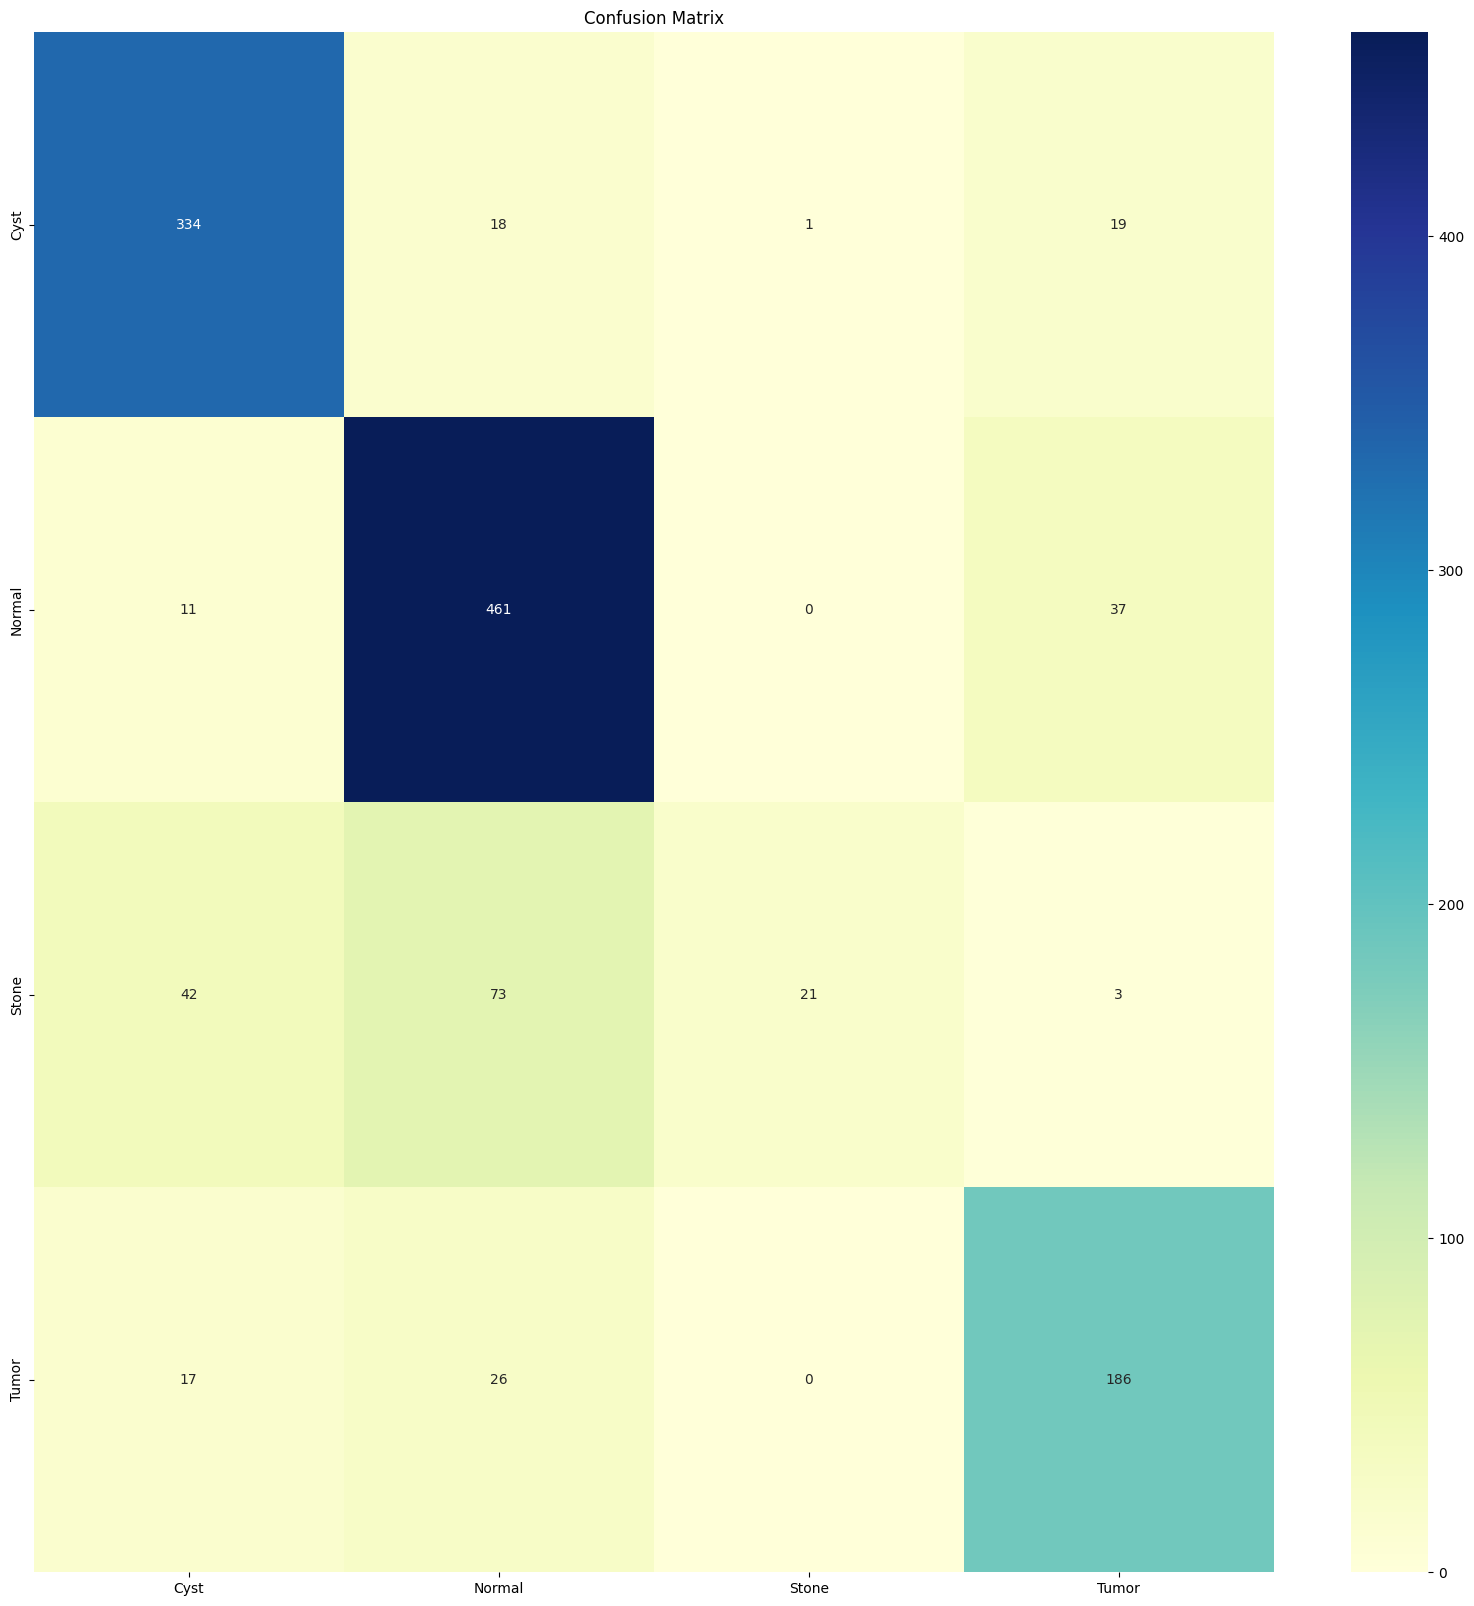

In [ ]:
evaluate(test_dataset.classes, predictions)